In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ultranest
import read_beam_FEKO as rf
from ultranest.plot import cornerplot

In [2]:
o = rf.read_beam_FEKO('nominal.out',0)

 Frequency in Hz:               FREQ =    2.50000E+07

 Frequency in Hz:               FREQ =    2.60000E+07

 Frequency in Hz:               FREQ =    2.70000E+07

 Frequency in Hz:               FREQ =    2.80000E+07

 Frequency in Hz:               FREQ =    2.90000E+07

 Frequency in Hz:               FREQ =    3.00000E+07

 Frequency in Hz:               FREQ =    3.10000E+07

 Frequency in Hz:               FREQ =    3.20000E+07

 Frequency in Hz:               FREQ =    3.30000E+07

 Frequency in Hz:               FREQ =    3.40000E+07

 Frequency in Hz:               FREQ =    3.50000E+07

 Frequency in Hz:               FREQ =    3.60000E+07

 Frequency in Hz:               FREQ =    3.70000E+07

 Frequency in Hz:               FREQ =    3.80000E+07

 Frequency in Hz:               FREQ =    3.90000E+07

 Frequency in Hz:               FREQ =    4.00000E+07

 Frequency in Hz:               FREQ =    4.10000E+07

 Frequency in Hz:               FREQ =    4.20000E+07

 Frequency

In [3]:
theta = 90 - o[2]
phi = o[1]
freq = o[0]
gain = o[5]

In [4]:
theta, phi = np.meshgrid(theta, phi)

In [5]:
def Gaussian2D(A, sigx, sigy):
    return A * np.exp(-(theta*np.pi/180*np.cos(phi*np.pi/180))**2/2/sigx**2 - (theta*np.pi/180*np.sin(phi*np.pi/180))**2/2/sigy**2) 

In [6]:
# Define model to simulate data
def model1(paras):
    A, sigx, sigy = paras
    return Gaussian2D(A,sigx,sigy).T

In [7]:
sigma = np.std(gain[100])

In [11]:
param_names = ['A', 'sigx', 'sigy']
def my_prior_transform(cube):
    params = cube.copy()

    # transform location parameter: uniform prior
    lo = 0
    hi = 10
    params[0] = cube[0] * (hi - lo) + lo

    lo = 0
    hi = 2
    params[1] = cube[1] * (hi - lo) + lo

    lo = 0
    hi = 2
    params[1] = cube[1] * (hi - lo) + lo
    
    return params

In [9]:
sampler = ultranest.ReactiveNestedSampler(param_names, my_likelihood, my_prior_transform)

In [10]:
result = sampler.run(min_num_live_points=200)
sampler.print_results()

[ultranest] Sampling 200 live points from prior ...


[ultranest] Explored until L=-2e+02  .29 [-177.3470..-177.3468]*| it/evals=3920/7828 eff=51.3896% N=200 0  0  
[ultranest] Likelihood function evaluations: 7835
[ultranest]   logZ = -192.3 +- 0.1984
[ultranest] Effective samples strategy satisfied (ESS = 929.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)
[ultranest]   logZ error budget: single: 0.26 bs:0.20 tail:0.01 total:0.20 required:<0.50
[ultranest] done iterating.

logZ = -192.334 +- 0.402
  single instance: logZ = -192.334 +- 0.260
  bootstrapped   : logZ = -192.312 +- 0.401
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    A                   : 5.063 │ ▁▁▁▁▁▁▁▁▂▂▃▅▅▅▆▇▇▇▆▇▅▆▅▅▄▃▃▁▁▁▁▁▁▁▁▁▁ │5.236     5.147 +- 0.024
    sigx                : 0.3059│ ▁ ▁▁▁▁▁▁▂▃▁▃▃▄▆▆▅▇▇▇▆▆▅▄▃▂▂▂▁▁▁▁▁▁▁ ▁ │0.3241    0.3148 +- 0.0023
    sigy               

In [18]:
A = np.average((result["samples"].T)[0])
sigx = np.average((result["samples"].T)[1])
sigy = np.average((result["samples"].T)[2])

In [12]:
Atotal = []
sigxtotal = []
sigytotal = []
for i in range(len(freq)):
    sigma = np.std(gain[i])
    def my_likelihood(params):
        mo = model1(params)
        diff = mo - gain[i]
        return -0.5 * np.sum((diff/sigma)**2)
    sampler = ultranest.ReactiveNestedSampler(param_names, my_likelihood, my_prior_transform)
    result = sampler.run(min_num_live_points=100)
    A = np.average((result["samples"].T)[0])
    sigx = np.average((result["samples"].T)[1])
    sigy = np.average((result["samples"].T)[2])
    Atotal.append(A)
    sigxtotal.append(sigx)
    sigytotal.append(sigy)

[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .79 [-185.8514..-185.8257] | it/evals=2240/5347 eff=42.6911% N=100        00  0  0 
[ultranest] Likelihood function evaluations: 5349
[ultranest]   logZ = -203.5 +- 0.3352
[ultranest] Effective samples strategy satisfied (ESS = 450.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 1.09, need <0.5)
[ultranest]   logZ error budget: single: 0.40 bs:0.34 tail:0.01 total:0.34 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .25 [-184.3228..-184.3025] | it/evals=2280/5263 eff=44.1604% N=100    0  00 0 0  0 
[ultranest] Likelihood function evaluations: 5269
[ultranest]   logZ = -202.4 +- 0.2758
[ultranest] Effective samples strategy satisfied (ESS = 466.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.79, need <0.5)
[ultranest]   logZ error budget: single: 0.41 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .82 [-182.8777..-182.8561] | it/evals=2220/5189 eff=43.6235% N=100   0   0 0  0 
[ultranest] Likelihood function evaluations: 5193
[ultranest]   logZ = -199.9 +- 0.244
[ultranest] Effective samples strategy satisfied (ESS = 498.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.58, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .51 [-181.5764..-181.5481] | it/evals=2231/5377 eff=42.2778% N=100       0  0  0 
[ultranest] Likelihood function evaluations: 5377
[ultranest]   logZ = -198.8 +- 0.379
[ultranest] Effective samples strategy satisfied (ESS = 484.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.30 to 1.09, need <0.5)
[ultranest]   logZ error budget: single: 0.40 bs:0.38 tail:0.01 total:0.38 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .29 [-180.3492..-180.3258] | it/evals=2185/5135 eff=43.3962% N=100 0 0    00  0 
[ultranest] Likelihood function evaluations: 5135
[ultranest]   logZ = -197 +- 0.3082
[ultranest] Effective samples strategy satisfied (ESS = 498.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.49+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.62, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.31 tail:0.01 total:0.31 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .16 [-179.2083..-179.1899] | it/evals=2170/5209 eff=42.4741% N=100   0    0 0  0 
[ultranest] Likelihood function evaluations: 5212
[ultranest]   logZ = -195.8 +- 0.3282
[ultranest] Effective samples strategy satisfied (ESS = 456.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.27 to 0.66, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.33 tail:0.01 total:0.33 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .10 [-178.1951..-178.1575] | it/evals=2231/5012 eff=45.4194% N=100   0    0 0   
[ultranest] Likelihood function evaluations: 5019
[ultranest]   logZ = -195.4 +- 0.3179
[ultranest] Effective samples strategy satisfied (ESS = 488.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.27 to 0.71, need <0.5)
[ultranest]   logZ error budget: single: 0.40 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .12 [-177.1859..-177.1593] | it/evals=2250/5281 eff=43.4279% N=100   0   0  00 
[ultranest] Likelihood function evaluations: 5284
[ultranest]   logZ = -194.5 +- 0.3067
[ultranest] Effective samples strategy satisfied (ESS = 490.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.26 to 0.70, need <0.5)
[ultranest]   logZ error budget: single: 0.40 bs:0.31 tail:0.01 total:0.31 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .21 [-176.2804..-176.2509] | it/evals=2170/5022 eff=44.0878% N=100   0    0    
[ultranest] Likelihood function evaluations: 5025
[ultranest]   logZ = -193.2 +- 0.2433
[ultranest] Effective samples strategy satisfied (ESS = 470.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.19 to 0.56, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .35 [-175.4268..-175.3939] | it/evals=2170/5044 eff=43.8916% N=100 0 0  00  0 
[ultranest] Likelihood function evaluations: 5052
[ultranest]   logZ = -192.4 +- 0.3444
[ultranest] Effective samples strategy satisfied (ESS = 484.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.26 to 1.19, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.34 tail:0.01 total:0.34 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .55 [-174.6144..-174.5878] | it/evals=2231/5074 eff=44.8532% N=100   0   0  0  
[ultranest] Likelihood function evaluations: 5075
[ultranest]   logZ = -191.7 +- 0.3464
[ultranest] Effective samples strategy satisfied (ESS = 476.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.28 to 0.96, need <0.5)
[ultranest]   logZ error budget: single: 0.40 bs:0.35 tail:0.01 total:0.35 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .80 [-173.8624..-173.8380] | it/evals=2190/5241 eff=42.5987% N=100   00  0  0  
[ultranest] Likelihood function evaluations: 5244
[ultranest]   logZ = -190.5 +- 0.2568
[ultranest] Effective samples strategy satisfied (ESS = 462.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.16 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.19 to 0.74, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .10 [-173.1808..-173.1590] | it/evals=2150/5111 eff=42.9056% N=100   0    0  0 
[ultranest] Likelihood function evaluations: 5114
[ultranest]   logZ = -189.9 +- 0.3492
[ultranest] Effective samples strategy satisfied (ESS = 468.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.18 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.30 to 0.62, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.35 tail:0.01 total:0.35 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .44 [-172.5350..-172.4950] | it/evals=2110/4826 eff=44.6466% N=100   0    0  0 
[ultranest] Likelihood function evaluations: 4844
[ultranest]   logZ = -188.9 +- 0.2145
[ultranest] Effective samples strategy satisfied (ESS = 438.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.15 to 0.72, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.21 tail:0.01 total:0.21 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .83 [-171.9159..-171.8805] | it/evals=2170/5293 eff=41.7870% N=100   0    0  0 
[ultranest] Likelihood function evaluations: 5293
[ultranest]   logZ = -188.8 +- 0.2527
[ultranest] Effective samples strategy satisfied (ESS = 490.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.18 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.25, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .24 [-171.3202..-171.2914] | it/evals=2170/5126 eff=43.1755% N=100 0 0   0  00 
[ultranest] Likelihood function evaluations: 5139
[ultranest]   logZ = -188.2 +- 0.2549
[ultranest] Effective samples strategy satisfied (ESS = 469.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.60, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .70 [-170.7949..-170.7630] | it/evals=2110/4686 eff=46.0096% N=100   0    0  0 
[ultranest] Likelihood function evaluations: 4695
[ultranest]   logZ = -187.4 +- 0.2376
[ultranest] Effective samples strategy satisfied (ESS = 478.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.43+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.74, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .19 [-170.2681..-170.2398] | it/evals=2180/5079 eff=43.7839% N=100   00   0  0 
[ultranest] Likelihood function evaluations: 5097
[ultranest]   logZ = -187.2 +- 0.2575
[ultranest] Effective samples strategy satisfied (ESS = 474.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.31 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.51, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .71 [-169.7832..-169.7520] | it/evals=2130/5158 eff=42.1115% N=100   0    0  0 
[ultranest] Likelihood function evaluations: 5160
[ultranest]   logZ = -186 +- 0.3561
[ultranest] Effective samples strategy satisfied (ESS = 472.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.28 to 0.92, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.36 tail:0.01 total:0.36 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .26 [-169.3227..-169.2994] | it/evals=2130/5009 eff=43.3897% N=100   00  0   0 
[ultranest] Likelihood function evaluations: 5017
[ultranest]   logZ = -186 +- 0.2989
[ultranest] Effective samples strategy satisfied (ESS = 489.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.26 to 0.62, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.30 tail:0.01 total:0.30 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .83 [-168.8861..-168.8622] | it/evals=2210/5387 eff=41.8006% N=100   0     0 0 
[ultranest] Likelihood function evaluations: 5402
[ultranest]   logZ = -185.8 +- 0.376
[ultranest] Effective samples strategy satisfied (ESS = 468.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.30 to 0.88, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.38 tail:0.01 total:0.38 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .43 [-168.5315..-168.4913] | it/evals=2090/4762 eff=44.8305% N=100 0 00   0    
[ultranest] Likelihood function evaluations: 4777
[ultranest]   logZ = -184.6 +- 0.2399
[ultranest] Effective samples strategy satisfied (ESS = 496.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.53, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .05 [-168.1189..-168.0984] | it/evals=2110/4626 eff=46.6195% N=100   0   0 0 0 
[ultranest] Likelihood function evaluations: 4638
[ultranest]   logZ = -184.7 +- 0.2755
[ultranest] Effective samples strategy satisfied (ESS = 480.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.66, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .69 [-167.7475..-167.7232] | it/evals=2120/4886 eff=44.2959% N=100    0    0 0 
[ultranest] Likelihood function evaluations: 4894
[ultranest]   logZ = -183.9 +- 0.2568
[ultranest] Effective samples strategy satisfied (ESS = 491.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.51, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .34 [-167.4289..-167.4017] | it/evals=2050/4774 eff=43.8596% N=100   0   00  0 
[ultranest] Likelihood function evaluations: 4786
[ultranest]   logZ = -183.3 +- 0.2381
[ultranest] Effective samples strategy satisfied (ESS = 486.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.62, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .02 [-167.1142..-167.0766] | it/evals=2110/4979 eff=43.2466% N=100 0 0    00 0 
[ultranest] Likelihood function evaluations: 4991
[ultranest]   logZ = -183.6 +- 0.378
[ultranest] Effective samples strategy satisfied (ESS = 453.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.31 to 0.97, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.38 tail:0.01 total:0.38 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .72 [-166.7735..-166.7528] | it/evals=2170/4910 eff=45.1143% N=100   0     0 
[ultranest] Likelihood function evaluations: 4924
[ultranest]   logZ = -183.3 +- 0.2334
[ultranest] Effective samples strategy satisfied (ESS = 481.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.51, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.23 tail:0.01 total:0.23 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .43 [-166.4871..-166.4701] | it/evals=2070/4947 eff=42.7068% N=100 0 0   100 
[ultranest] Likelihood function evaluations: 4971
[ultranest]   logZ = -182.1 +- 0.317
[ultranest] Effective samples strategy satisfied (ESS = 462.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.70, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .16 [-166.2199..-166.1986] | it/evals=2100/5105 eff=41.9580% N=100   0      
[ultranest] Likelihood function evaluations: 5123
[ultranest]   logZ = -182.1 +- 0.3198
[ultranest] Effective samples strategy satisfied (ESS = 476.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.27 to 0.78, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .90 [-165.9581..-165.9363] | it/evals=2050/4797 eff=43.6449% N=100   0   0 
[ultranest] Likelihood function evaluations: 4808
[ultranest]   logZ = -181.4 +- 0.2397
[ultranest] Effective samples strategy satisfied (ESS = 485.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.52, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .65 [-165.7247..-165.6995] | it/evals=2190/5131 eff=43.5301% N=100   0     0 
[ultranest] Likelihood function evaluations: 5137
[ultranest]   logZ = -182.5 +- 0.2956
[ultranest] Effective samples strategy satisfied (ESS = 479.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.81, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.30 tail:0.01 total:0.30 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .41 [-165.4889..-165.4601] | it/evals=2140/4878 eff=44.7886% N=100   0    0 
[ultranest] Likelihood function evaluations: 4886
[ultranest]   logZ = -181.9 +- 0.2582
[ultranest] Effective samples strategy satisfied (ESS = 499.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.78, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .18 [-165.2478..-165.2255] | it/evals=2030/4651 eff=44.6056% N=100   0  00  
[ultranest] Likelihood function evaluations: 4656
[ultranest]   logZ = -180.5 +- 0.2096
[ultranest] Effective samples strategy satisfied (ESS = 455.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.17 to 0.50, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.21 tail:0.01 total:0.21 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .96 [-165.0298..-165.0074] | it/evals=2030/4736 eff=43.7877% N=100    0   0 
[ultranest] Likelihood function evaluations: 4749
[ultranest]   logZ = -180.3 +- 0.2334
[ultranest] Effective samples strategy satisfied (ESS = 462.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.56, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.23 tail:0.01 total:0.23 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .75 [-164.8474..-164.8076] | it/evals=2050/4901 eff=42.6994% N=100   0   0 
[ultranest] Likelihood function evaluations: 4921
[ultranest]   logZ = -180.6 +- 0.2803
[ultranest] Effective samples strategy satisfied (ESS = 453.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.24 to 0.59, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .55 [-164.6260..-164.5974] | it/evals=2100/4866 eff=44.0621% N=100 0 0    0 
[ultranest] Likelihood function evaluations: 4882
[ultranest]   logZ = -180.7 +- 0.2392
[ultranest] Effective samples strategy satisfied (ESS = 462.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.18 to 0.72, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .36 [-164.4375..-164.4023] | it/evals=2070/4683 eff=45.1669% N=100   0   00 
[ultranest] Likelihood function evaluations: 4687
[ultranest]   logZ = -180 +- 0.2374
[ultranest] Effective samples strategy satisfied (ESS = 465.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.23 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.19 to 0.68, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .17 [-164.2123..-164.1951] | it/evals=2150/5193 eff=42.2148% N=100   0  00  
[ultranest] Likelihood function evaluations: 5205
[ultranest]   logZ = -180.5 +- 0.2174
[ultranest] Effective samples strategy satisfied (ESS = 445.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.17 to 0.60, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.22 tail:0.01 total:0.22 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .99 [-164.0680..-164.0354] | it/evals=2050/4939 eff=42.3641% N=100   0   0 
[ultranest] Likelihood function evaluations: 4942
[ultranest]   logZ = -179.8 +- 0.279
[ultranest] Effective samples strategy satisfied (ESS = 490.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.71, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .81 [-163.8821..-163.8505] | it/evals=2100/4831 eff=44.3881% N=100       0 
[ultranest] Likelihood function evaluations: 4841
[ultranest]   logZ = -180.3 +- 0.2607
[ultranest] Effective samples strategy satisfied (ESS = 461.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.71, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .64 [-163.7152..-163.6901] | it/evals=2100/5052 eff=42.4071% N=100         
[ultranest] Likelihood function evaluations: 5052
[ultranest]   logZ = -179.8 +- 0.3313
[ultranest] Effective samples strategy satisfied (ESS = 494.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.28 to 0.79, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.33 tail:0.01 total:0.33 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .47 [-163.5467..-163.5170] | it/evals=2090/4854 eff=43.9630% N=100   0 0 0 
[ultranest] Likelihood function evaluations: 4856
[ultranest]   logZ = -179.4 +- 0.3012
[ultranest] Effective samples strategy satisfied (ESS = 488.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.76, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.30 tail:0.01 total:0.30 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .31 [-163.3965..-163.3616] | it/evals=2070/4852 eff=43.5606% N=100       0 
[ultranest] Likelihood function evaluations: 4854
[ultranest]   logZ = -179.2 +- 0.3179
[ultranest] Effective samples strategy satisfied (ESS = 451.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.24 to 0.72, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .15 [-163.2024..-163.1820] | it/evals=2050/4727 eff=44.3052% N=100 0 0    
[ultranest] Likelihood function evaluations: 4733
[ultranest]   logZ = -178.7 +- 0.2704
[ultranest] Effective samples strategy satisfied (ESS = 479.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.55, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.27 tail:0.01 total:0.27 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .99 [-163.0742..-163.0441] | it/evals=2010/4573 eff=44.9363% N=100   0   0 
[ultranest] Likelihood function evaluations: 4583
[ultranest]   logZ = -178.5 +- 0.3535
[ultranest] Effective samples strategy satisfied (ESS = 442.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.19 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.30 to 0.81, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.35 tail:0.01 total:0.35 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .84 [-162.9056..-162.8866] | it/evals=2090/4857 eff=43.9353% N=100   0   0 
[ultranest] Likelihood function evaluations: 4862
[ultranest]   logZ = -179 +- 0.2771
[ultranest] Effective samples strategy satisfied (ESS = 436.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.96, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .69 [-162.8006..-162.7581] | it/evals=2001/4769 eff=42.8571% N=100   0   0 
[ultranest] Likelihood function evaluations: 4781
[ultranest]   logZ = -178.1 +- 0.2852
[ultranest] Effective samples strategy satisfied (ESS = 483.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.64, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.29 tail:0.01 total:0.29 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .54 [-162.5979..-162.5755] | it/evals=2070/4892 eff=43.1970% N=100   0   0 
[ultranest] Likelihood function evaluations: 4895
[ultranest]   logZ = -178.1 +- 0.2883
[ultranest] Effective samples strategy satisfied (ESS = 475.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.76, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.29 tail:0.01 total:0.29 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .39 [-162.4727..-162.4448] | it/evals=2070/4938 eff=42.7863% N=100   0   0 
[ultranest] Likelihood function evaluations: 4953
[ultranest]   logZ = -178.5 +- 0.2849
[ultranest] Effective samples strategy satisfied (ESS = 444.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 1.02, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.28 tail:0.01 total:0.29 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .25 [-162.3344..-162.3015] | it/evals=2020/4620 eff=44.6903% N=100   0 0 0 
[ultranest] Likelihood function evaluations: 4620
[ultranest]   logZ = -177.8 +- 0.2042
[ultranest] Effective samples strategy satisfied (ESS = 462.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.20 tail:0.01 total:0.20 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .11 [-162.1971..-162.1649] | it/evals=2030/4849 eff=42.7458% N=100      0 
[ultranest] Likelihood function evaluations: 4850
[ultranest]   logZ = -177.8 +- 0.2956
[ultranest] Effective samples strategy satisfied (ESS = 471.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.68, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.30 tail:0.01 total:0.30 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .97 [-162.0354..-162.0145] | it/evals=2100/5029 eff=42.6050% N=100   0   0 
[ultranest] Likelihood function evaluations: 5039
[ultranest]   logZ = -177.7 +- 0.3158
[ultranest] Effective samples strategy satisfied (ESS = 500.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.86, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .84 [-161.9408..-161.8982] | it/evals=2020/4794 eff=43.0337% N=100   0   0 
[ultranest] Likelihood function evaluations: 4804
[ultranest]   logZ = -177.5 +- 0.3512
[ultranest] Effective samples strategy satisfied (ESS = 454.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.26 to 0.76, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.35 tail:0.01 total:0.35 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .70 [-161.7610..-161.7326] | it/evals=2100/5008 eff=42.7873% N=100   00  0 
[ultranest] Likelihood function evaluations: 5034
[ultranest]   logZ = -177.9 +- 0.3167
[ultranest] Effective samples strategy satisfied (ESS = 501.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.84, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .57 [-161.6449..-161.6128] | it/evals=2030/4911 eff=42.1950% N=100   0   0 
[ultranest] Likelihood function evaluations: 4919
[ultranest]   logZ = -177 +- 0.2746
[ultranest] Effective samples strategy satisfied (ESS = 454.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.21 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.24 to 0.60, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.27 tail:0.01 total:0.27 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .44 [-161.5198..-161.4924] | it/evals=2030/4916 eff=42.1512% N=100   0   0 
[ultranest] Likelihood function evaluations: 4919
[ultranest]   logZ = -177.1 +- 0.2749
[ultranest] Effective samples strategy satisfied (ESS = 469.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.69, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.27 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .32 [-161.3774..-161.3519] | it/evals=2080/4979 eff=42.6317% N=100   0   0 
[ultranest] Likelihood function evaluations: 4988
[ultranest]   logZ = -177 +- 0.231
[ultranest] Effective samples strategy satisfied (ESS = 478.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.60, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.23 tail:0.01 total:0.23 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .19 [-161.2575..-161.2357] | it/evals=2040/4802 eff=43.3858% N=100   0   0 
[ultranest] Likelihood function evaluations: 4802
[ultranest]   logZ = -176.6 +- 0.2596
[ultranest] Effective samples strategy satisfied (ESS = 445.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.67, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .07 [-161.1572..-161.1327] | it/evals=2116/4892 eff=44.1569% N=100   0     
[ultranest] Likelihood function evaluations: 4898
[ultranest]   logZ = -177.7 +- 0.3691
[ultranest] Effective samples strategy satisfied (ESS = 482.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.30 to 0.91, need <0.5)
[ultranest]   logZ error budget: single: 0.39 bs:0.37 tail:0.01 total:0.37 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .96 [-161.0263..-161.0036] | it/evals=2030/4969 eff=41.6923% N=100   0  0 
[ultranest] Likelihood function evaluations: 4987
[ultranest]   logZ = -176.6 +- 0.3299
[ultranest] Effective samples strategy satisfied (ESS = 492.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.96, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.33 tail:0.01 total:0.33 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .85 [-160.9282..-160.8954] | it/evals=2050/4682 eff=44.7403% N=100      0 
[ultranest] Likelihood function evaluations: 4705
[ultranest]   logZ = -176.6 +- 0.2797
[ultranest] Effective samples strategy satisfied (ESS = 491.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.18 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.74, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .75 [-160.8165..-160.7919] | it/evals=2093/5048 eff=42.2999% N=100   0  0 
[ultranest] Likelihood function evaluations: 5051
[ultranest]   logZ = -176.6 +- 0.2813
[ultranest] Effective samples strategy satisfied (ESS = 485.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.72, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .64 [-160.7088..-160.6832] | it/evals=2001/4629 eff=44.1819% N=100   0   0 
[ultranest] Likelihood function evaluations: 4630
[ultranest]   logZ = -175.8 +- 0.2949
[ultranest] Effective samples strategy satisfied (ESS = 462.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.24 to 0.85, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.29 tail:0.01 total:0.29 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .55 [-160.6115..-160.5846] | it/evals=2010/4915 eff=41.7445% N=100   0   0 
[ultranest] Likelihood function evaluations: 4918
[ultranest]   logZ = -175.6 +- 0.2631
[ultranest] Effective samples strategy satisfied (ESS = 466.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.70, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .46 [-160.5288..-160.5001] | it/evals=2070/4820 eff=43.8559% N=100   0   0 
[ultranest] Likelihood function evaluations: 4832
[ultranest]   logZ = -176.4 +- 0.3454
[ultranest] Effective samples strategy satisfied (ESS = 482.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.30 to 0.78, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.35 tail:0.01 total:0.35 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .38 [-160.4437..-160.4223] | it/evals=2024/4877 eff=42.3697% N=100   0  
[ultranest] Likelihood function evaluations: 4889
[ultranest]   logZ = -176 +- 0.3447
[ultranest] Effective samples strategy satisfied (ESS = 474.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 1.08, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.34 tail:0.01 total:0.34 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .30 [-160.3815..-160.3519] | it/evals=2050/4809 eff=43.5337% N=100 0 0     
[ultranest] Likelihood function evaluations: 4822
[ultranest]   logZ = -176.1 +- 0.3089
[ultranest] Effective samples strategy satisfied (ESS = 456.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.27 to 0.70, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.31 tail:0.01 total:0.31 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .24 [-160.3124..-160.2863] | it/evals=2001/4638 eff=44.0943% N=100   0  0 
[ultranest] Likelihood function evaluations: 4643
[ultranest]   logZ = -175.6 +- 0.246
[ultranest] Effective samples strategy satisfied (ESS = 476.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.54, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .18 [-160.2265..-160.2079] | it/evals=2030/4632 eff=44.7926% N=100 0 0   
[ultranest] Likelihood function evaluations: 4659
[ultranest]   logZ = -175.3 +- 0.2283
[ultranest] Effective samples strategy satisfied (ESS = 469.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.19 to 0.56, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.23 tail:0.00 total:0.23 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .13 [-160.2233..-160.1887] | it/evals=2010/4816 eff=42.6209% N=100 0 0   0 
[ultranest] Likelihood function evaluations: 4826
[ultranest]   logZ = -175.6 +- 0.3235
[ultranest] Effective samples strategy satisfied (ESS = 457.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.28 to 0.99, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .09 [-160.1821..-160.1447] | it/evals=2030/4774 eff=43.4318% N=100   0   0 
[ultranest] Likelihood function evaluations: 4786
[ultranest]   logZ = -175.9 +- 0.3742
[ultranest] Effective samples strategy satisfied (ESS = 446.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.32 to 0.71, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.37 tail:0.01 total:0.37 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .07 [-160.1478..-160.1188] | it/evals=2020/4836 eff=42.6520% N=100   0    
[ultranest] Likelihood function evaluations: 4842
[ultranest]   logZ = -175.5 +- 0.2161
[ultranest] Effective samples strategy satisfied (ESS = 458.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.21 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.22, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.22 tail:0.01 total:0.22 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .05 [-160.1083..-160.0888] | it/evals=2050/4694 eff=44.6234% N=100   0   
[ultranest] Likelihood function evaluations: 4705
[ultranest]   logZ = -175.3 +- 0.2458
[ultranest] Effective samples strategy satisfied (ESS = 474.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.16 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.52, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .05 [-160.1190..-160.0941] | it/evals=1990/4682 eff=43.4308% N=100   0   0 
[ultranest] Likelihood function evaluations: 4688
[ultranest]   logZ = -175.3 +- 0.3008
[ultranest] Effective samples strategy satisfied (ESS = 486.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.60, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.30 tail:0.01 total:0.30 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .05 [-160.1069..-160.0886] | it/evals=2060/4870 eff=43.1866% N=100   0   
[ultranest] Likelihood function evaluations: 4870
[ultranest]   logZ = -175.4 +- 0.2533
[ultranest] Effective samples strategy satisfied (ESS = 455.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.56, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .07 [-160.1531..-160.1238] | it/evals=1955/4639 eff=43.0712% N=100   0  0 
[ultranest] Likelihood function evaluations: 4644
[ultranest]   logZ = -175.1 +- 0.2609
[ultranest] Effective samples strategy satisfied (ESS = 466.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.18 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.19 to 0.93, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .10 [-160.1595..-160.1406] | it/evals=2020/4747 eff=43.4689% N=100   0   
[ultranest] Likelihood function evaluations: 4747
[ultranest]   logZ = -175.1 +- 0.3281
[ultranest] Effective samples strategy satisfied (ESS = 440.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.27 to 0.78, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.33 tail:0.01 total:0.33 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .16 [-160.2200..-160.2000] | it/evals=1980/4863 eff=41.5704% N=100   0   
[ultranest] Likelihood function evaluations: 4878
[ultranest]   logZ = -175.2 +- 0.3692
[ultranest] Effective samples strategy satisfied (ESS = 448.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.32 to 0.89, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.37 tail:0.01 total:0.37 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .22 [-160.2873..-160.2599] | it/evals=1980/4682 eff=43.2126% N=100   0   
[ultranest] Likelihood function evaluations: 4711
[ultranest]   logZ = -175.3 +- 0.3011
[ultranest] Effective samples strategy satisfied (ESS = 450.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.18 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.26 to 0.75, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.30 tail:0.01 total:0.30 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .30 [-160.3921..-160.3530] | it/evals=2040/4611 eff=45.2228% N=100   0 0 
[ultranest] Likelihood function evaluations: 4614
[ultranest]   logZ = -176 +- 0.1808
[ultranest] Effective samples strategy satisfied (ESS = 495.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.43+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.18, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.18 tail:0.01 total:0.18 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .39 [-160.4553..-160.4267] | it/evals=1980/4876 eff=41.4573% N=100   0   
[ultranest] Likelihood function evaluations: 4876
[ultranest]   logZ = -175.4 +- 0.2145
[ultranest] Effective samples strategy satisfied (ESS = 443.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.22 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.21, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.21 tail:0.01 total:0.21 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .51 [-160.5746..-160.5491] | it/evals=2010/4723 eff=43.4783% N=100 0 0   
[ultranest] Likelihood function evaluations: 4739
[ultranest]   logZ = -175.8 +- 0.261
[ultranest] Effective samples strategy satisfied (ESS = 482.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.53, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .64 [-160.7345..-160.6940] | it/evals=1990/4733 eff=42.9527% N=100        
[ultranest] Likelihood function evaluations: 4735
[ultranest]   logZ = -175.8 +- 0.2822
[ultranest] Effective samples strategy satisfied (ESS = 480.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.63, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .80 [-160.8818..-160.8523] | it/evals=1980/4650 eff=43.5165% N=100   0  
[ultranest] Likelihood function evaluations: 4651
[ultranest]   logZ = -175.7 +- 0.2572
[ultranest] Effective samples strategy satisfied (ESS = 476.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.61, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.26 tail:0.01 total:0.26 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .98 [-161.0246..-161.0092] | it/evals=2001/4615 eff=44.3189% N=100   0   
[ultranest] Likelihood function evaluations: 4624
[ultranest]   logZ = -175.9 +- 0.2433
[ultranest] Effective samples strategy satisfied (ESS = 462.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.15 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.24, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .19 [-161.2745..-161.2358] | it/evals=2080/4952 eff=42.8689% N=100   0  
[ultranest] Likelihood function evaluations: 4954
[ultranest]   logZ = -177 +- 0.3088
[ultranest] Effective samples strategy satisfied (ESS = 474.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.24 to 0.76, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.31 tail:0.01 total:0.31 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .43 [-161.4928..-161.4712] | it/evals=2010/4829 eff=42.5037% N=100 0 0  
[ultranest] Likelihood function evaluations: 4851
[ultranest]   logZ = -176.6 +- 0.2394
[ultranest] Effective samples strategy satisfied (ESS = 475.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.16 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.52, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .71 [-161.7828..-161.7579] | it/evals=2050/4859 eff=43.0763% N=100   0   
[ultranest] Likelihood function evaluations: 4861
[ultranest]   logZ = -177.1 +- 0.2682
[ultranest] Effective samples strategy satisfied (ESS = 490.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.23 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.71, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.27 tail:0.01 total:0.27 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .04 [-162.1284..-162.0995] | it/evals=2060/4843 eff=43.4324% N=100   0 0 
[ultranest] Likelihood function evaluations: 4852
[ultranest]   logZ = -177.9 +- 0.394
[ultranest] Effective samples strategy satisfied (ESS = 464.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.14 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.31 to 1.09, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.39 tail:0.01 total:0.39 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .43 [-162.5066..-162.4773] | it/evals=2020/4885 eff=42.2153% N=100   0   
[ultranest] Likelihood function evaluations: 4894
[ultranest]   logZ = -177.8 +- 0.2922
[ultranest] Effective samples strategy satisfied (ESS = 460.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.22 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.24 to 0.68, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.29 tail:0.01 total:0.29 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .88 [-162.9598..-162.9321] | it/evals=2001/4815 eff=42.4390% N=100   0   
[ultranest] Likelihood function evaluations: 4821
[ultranest]   logZ = -178.1 +- 0.3049
[ultranest] Effective samples strategy satisfied (ESS = 468.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.18 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.23 to 0.92, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.30 tail:0.01 total:0.30 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .42 [-163.4887..-163.4676] | it/evals=1950/4656 eff=42.8007% N=100      
[ultranest] Likelihood function evaluations: 4658
[ultranest]   logZ = -178 +- 0.2381
[ultranest] Effective samples strategy satisfied (ESS = 493.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.59, need <0.5)
[ultranest]   logZ error budget: single: 0.36 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .06 [-164.1112..-164.0919] | it/evals=2024/4875 eff=42.3874% N=100   00 
[ultranest] Likelihood function evaluations: 4882
[ultranest]   logZ = -179.5 +- 0.2203
[ultranest] Effective samples strategy satisfied (ESS = 479.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.22, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.22 tail:0.01 total:0.22 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .82 [-164.8995..-164.8723] | it/evals=1940/4522 eff=43.8716% N=100   0   
[ultranest] Likelihood function evaluations: 4546
[ultranest]   logZ = -179.5 +- 0.243
[ultranest] Effective samples strategy satisfied (ESS = 468.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.19 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.55, need <0.5)
[ultranest]   logZ error budget: single: 0.36 bs:0.24 tail:0.01 total:0.24 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .74 [-165.8312..-165.7967] | it/evals=2030/4605 eff=45.0610% N=100   0   
[ultranest] Likelihood function evaluations: 4611
[ultranest]   logZ = -181.5 +- 0.2897
[ultranest] Effective samples strategy satisfied (ESS = 448.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.12 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.24 to 0.63, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.29 tail:0.01 total:0.29 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .85 [-166.9335..-166.9026] | it/evals=2020/4751 eff=43.4315% N=100   0   
[ultranest] Likelihood function evaluations: 4773
[ultranest]   logZ = -182.2 +- 0.2815
[ultranest] Effective samples strategy satisfied (ESS = 457.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.21 to 0.67, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.28 tail:0.01 total:0.28 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .20 [-168.2946..-168.2580] | it/evals=1990/4654 eff=43.6978% N=100   0  
[ultranest] Likelihood function evaluations: 4676
[ultranest]   logZ = -183.6 +- 0.2488
[ultranest] Effective samples strategy satisfied (ESS = 462.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.44+-0.16 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.22 to 0.51, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.25 tail:0.01 total:0.25 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .84 [-169.9081..-169.8759] | it/evals=2001/4629 eff=44.1819% N=100   0   
[ultranest] Likelihood function evaluations: 4648
[ultranest]   logZ = -185 +- 0.3086
[ultranest] Effective samples strategy satisfied (ESS = 466.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.17 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.25 to 0.83, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.31 tail:0.01 total:0.31 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .84 [-171.8846..-171.8688] | it/evals=2140/5259 eff=41.4809% N=100   0   
[ultranest] Likelihood function evaluations: 5269
[ultranest]   logZ = -188 +- 0.2308
[ultranest] Effective samples strategy satisfied (ESS = 477.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.48+-0.13 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.20 to 0.62, need <0.5)
[ultranest]   logZ error budget: single: 0.38 bs:0.23 tail:0.01 total:0.23 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .29 [-174.3589..-174.3318] | it/evals=1970/4704 eff=42.7889% N=100   0  
[ultranest] Likelihood function evaluations: 4731
[ultranest]   logZ = -189 +- 0.3154
[ultranest] Effective samples strategy satisfied (ESS = 456.2, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.20 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy wants 98 minimum live points (dlogz from 0.26 to 0.84, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.32 tail:0.01 total:0.32 required:<0.50
[ultranest] done iterating.
[ultranest] Sampling 100 live points from prior ...


[ultranest] Explored until L=-2e+02  .29 [-177.3620..-177.3321] | it/evals=1990/4637 eff=43.8616% N=100   00  
[ultranest] Likelihood function evaluations: 4659
[ultranest]   logZ = -192.4 +- 0.1731
[ultranest] Effective samples strategy satisfied (ESS = 475.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.17, need <0.5)
[ultranest]   logZ error budget: single: 0.37 bs:0.17 tail:0.01 total:0.17 required:<0.50
[ultranest] done iterating.


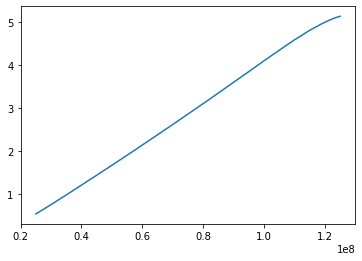

In [13]:
plt.plot(freq,Atotal)

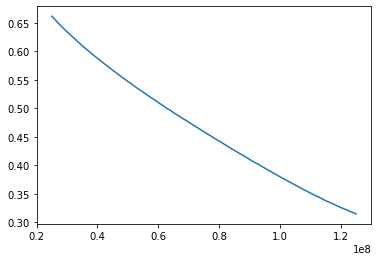

In [14]:
plt.plot(freq,sigxtotal)

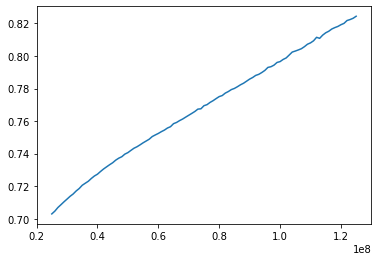

In [15]:
plt.plot(freq,sigytotal)

In [16]:
test = [0,10,20,30,40,50,60,70,80,90,100]

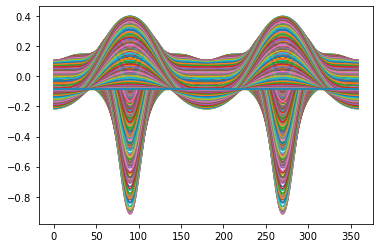

In [19]:
for i in test:
    A = Atotal[i]
    sigx = sigxtotal[i]
    sigy = sigytotal[i]
    residual = gain[i].T - Gaussian2D(A,sigx,sigy)
    plt.plot(residual)

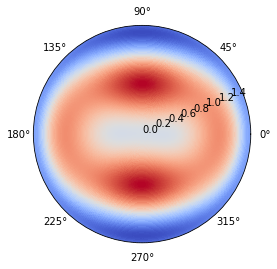

In [20]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[0].T - Gaussian2D(Atotal[0], sigxtotal[0],sigytotal[0]),cmap='coolwarm',shading='auto')

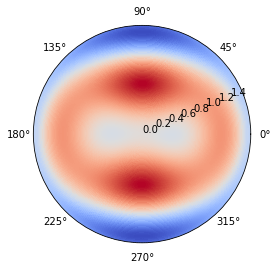

In [21]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[10].T - Gaussian2D(Atotal[10], sigxtotal[10],sigytotal[10]),cmap='coolwarm',shading='auto')

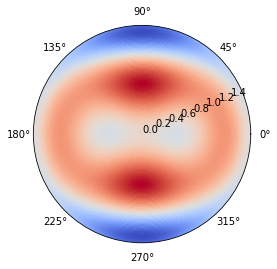

In [22]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[20].T - Gaussian2D(Atotal[20], sigxtotal[20],sigytotal[20]),cmap='coolwarm',shading='auto')


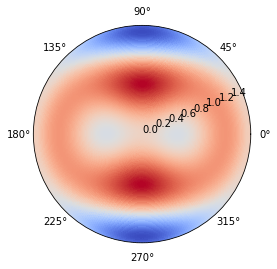

In [23]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[30].T - Gaussian2D(Atotal[30], sigxtotal[30],sigytotal[30]),cmap='coolwarm',shading='auto')


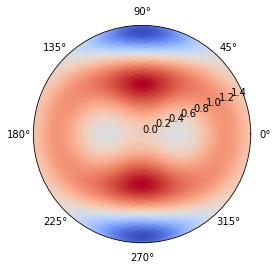

In [24]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[40].T - Gaussian2D(Atotal[40], sigxtotal[40],sigytotal[40]),cmap='coolwarm',shading='auto')


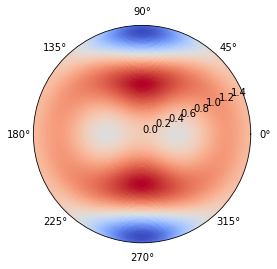

In [25]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[50].T - Gaussian2D(Atotal[50], sigxtotal[50],sigytotal[50]),cmap='coolwarm',shading='auto')


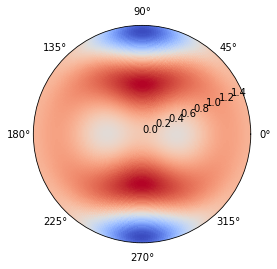

In [26]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[60].T - Gaussian2D(Atotal[60], sigxtotal[60],sigytotal[60]),cmap='coolwarm',shading='auto')


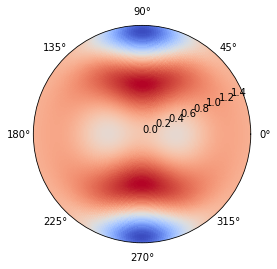

In [28]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[70].T - Gaussian2D(Atotal[70], sigxtotal[70],sigytotal[70]),cmap='coolwarm',shading='auto')


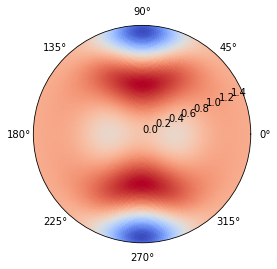

In [27]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[80].T - Gaussian2D(Atotal[80], sigxtotal[80],sigytotal[80]),cmap='coolwarm',shading='auto')


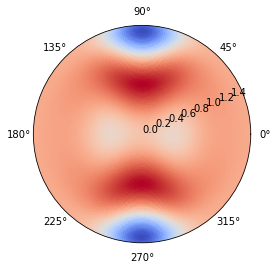

In [30]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[90].T - Gaussian2D(Atotal[90], sigxtotal[90],sigytotal[90]),cmap='coolwarm',shading='auto')


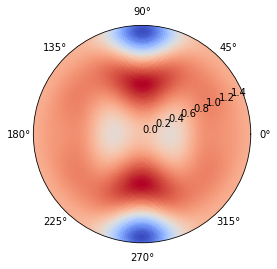

In [31]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(projection="polar"))
axs.pcolormesh(phi*np.pi/180,theta*np.pi/180,gain[100].T - Gaussian2D(Atotal[100], sigxtotal[100],sigytotal[100]),cmap='coolwarm',shading='auto')


In [20]:
xx = theta
yy = phi
sigma = np.sqrt(0.7*180/np.pi*0.66*180/np.pi)
#make sigma a input parameter
def Acos(R, theta, miu, nu):
    part1 = np.cos(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def Asin(R, theta, miu, nu):
    part1 = np.sin(miu*theta*np.pi/180)*(R/(sigma/1.43))**miu
    part2 = P(miu,nu,R**2/(sigma/1.43)**2)
    part3 = np.exp(-R**2/(4*(sigma/1.43)**2))
    return part1*part2*part3

def P(miu,nu,u):
    terms = []
    p = 0
    while p <= nu:
        up = np.math.factorial(miu + nu)*np.math.factorial(nu)
        down = np.math.factorial(miu + p)*np.math.factorial(p)*np.math.factorial(nu-p)
        term = (-2)**(nu-p)* up/down * u**p
        terms.append(term)
        p += 1
    terms = np.array(terms)
    return np.sum(terms,axis = 0)

In [ ]:
Acos(xx,yy,0,0)